In [11]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd

In [12]:
df = pd.read_csv('../data/mag/tax_nonaz_own.csv')

In [13]:
df.columns

Index(['geoid', 'Y18', 'Y19', 'Y20', 'Y21', 'Y22', 'Y23', 'Y2123_avg', 'Htot',
       'PctTot', 'PerCap', 'PerCapO'],
      dtype='object')

## Map non-AZ owners

In [14]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
geo = gpd.read_file('../data/geo/shapefiles/PUMAS.geojson')
#geo.head(2)

In [16]:
phx = gpd.read_file('../data/geo/shapefiles/phx.geojson')
villages = gpd.read_file('../data/geo/shapefiles/Villages.shp')
villages = villages.to_crs(4269)
road = gpd.read_file('../data/geo/shapefiles/maricopa_primroads.geojson')
road = road.to_crs(4269)
mask = gpd.read_file('../data/geo/shapefiles/PUMAS_mask.geojson')

### join data to geo files

In [17]:
df = pd.merge(geo,df,how='left',left_on='joinid',right_on='geoid')

In [18]:
df.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry,geoid,Y18,Y19,Y20,Y21,Y22,Y23,Y2123_avg,Htot,PctTot,PerCap,PerCapO
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475...",400129,3528,3454,3345,3295,3380,3452,3376,52580,6%,64,78
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874...",400112,10782,10840,10711,10707,10680,10694,10694,58257,18%,184,232


In [19]:
df.describe()

,ALAND20,AWATER20,joinid,geoid,Y18,Y19,Y20,Y21,Y22,Y23,Y2123_avg,Htot,PerCap,PerCapO
count,1.500000e+01,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.500315e+08,4.751324e+05,400119.466667,400119.466667,3450.333333,3358.600000,3306.400000,3304.066667,3396.600000,3518.733333,3406.400000,44415.866667,74.066667,121.133333
std,1.990223e+08,9.764382e+05,5.235411,5.235411,2163.869110,2209.989909,2186.918112,2186.213931,2156.860973,2129.723908,2156.546207,7062.480269,33.847276,41.474375
min,3.348861e+07,2.684700e+04,400112.000000,400112.000000,1767.000000,1675.000000,1597.000000,1539.000000,1555.000000,1671.000000,1588.000000,31437.000000,51.000000,78.000000
25%,5.061796e+07,7.029600e+04,400115.500000,400115.500000,2305.500000,2176.000000,2145.500000,2151.500000,2273.000000,2388.000000,2270.500000,41929.500000,55.500000,91.000000
50%,7.508780e+07,1.879480e+05,400119.000000,400119.000000,2843.000000,2730.000000,2788.000000,2926.000000,2939.000000,2956.000000,2940.000000,43773.000000,64.000000,112.000000
75%,1.181456e+08,3.115855e+05,400122.500000,400122.500000,3774.000000,3657.000000,3569.000000,3575.500000,3609.000000,3568.500000,3584.000000,48709.000000,79.000000,137.000000
max,6.540404e+08,3.894959e+06,400129.000000,400129.000000,10782.000000,10840.000000,10711.000000,10707.000000,10680.000000,10694.000000,10694.000000,58257.000000,184.000000,232.000000


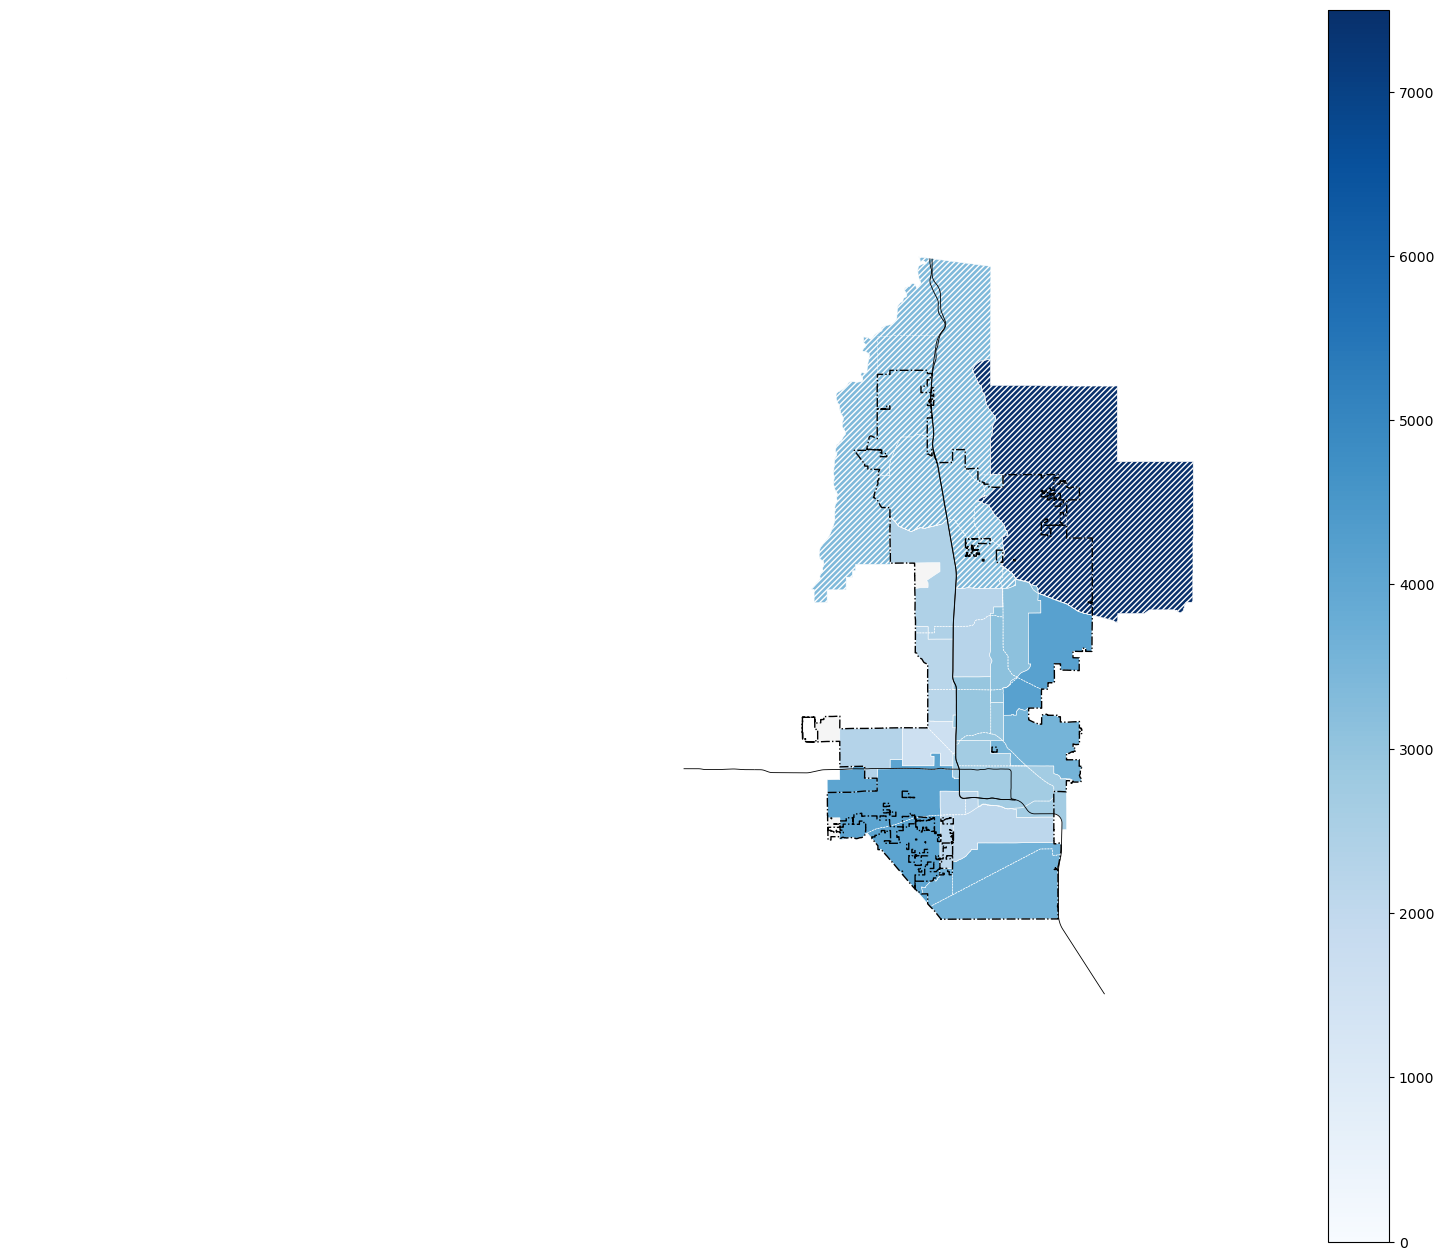

In [20]:
# average 2021-2023
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0,vmax=7500)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
df.plot(column = 'Y2123_avg', cmap='Blues', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
plt.savefig(f'img/nonAZ_own_2123_0820.jpg', dpi = 300) # saving each plot

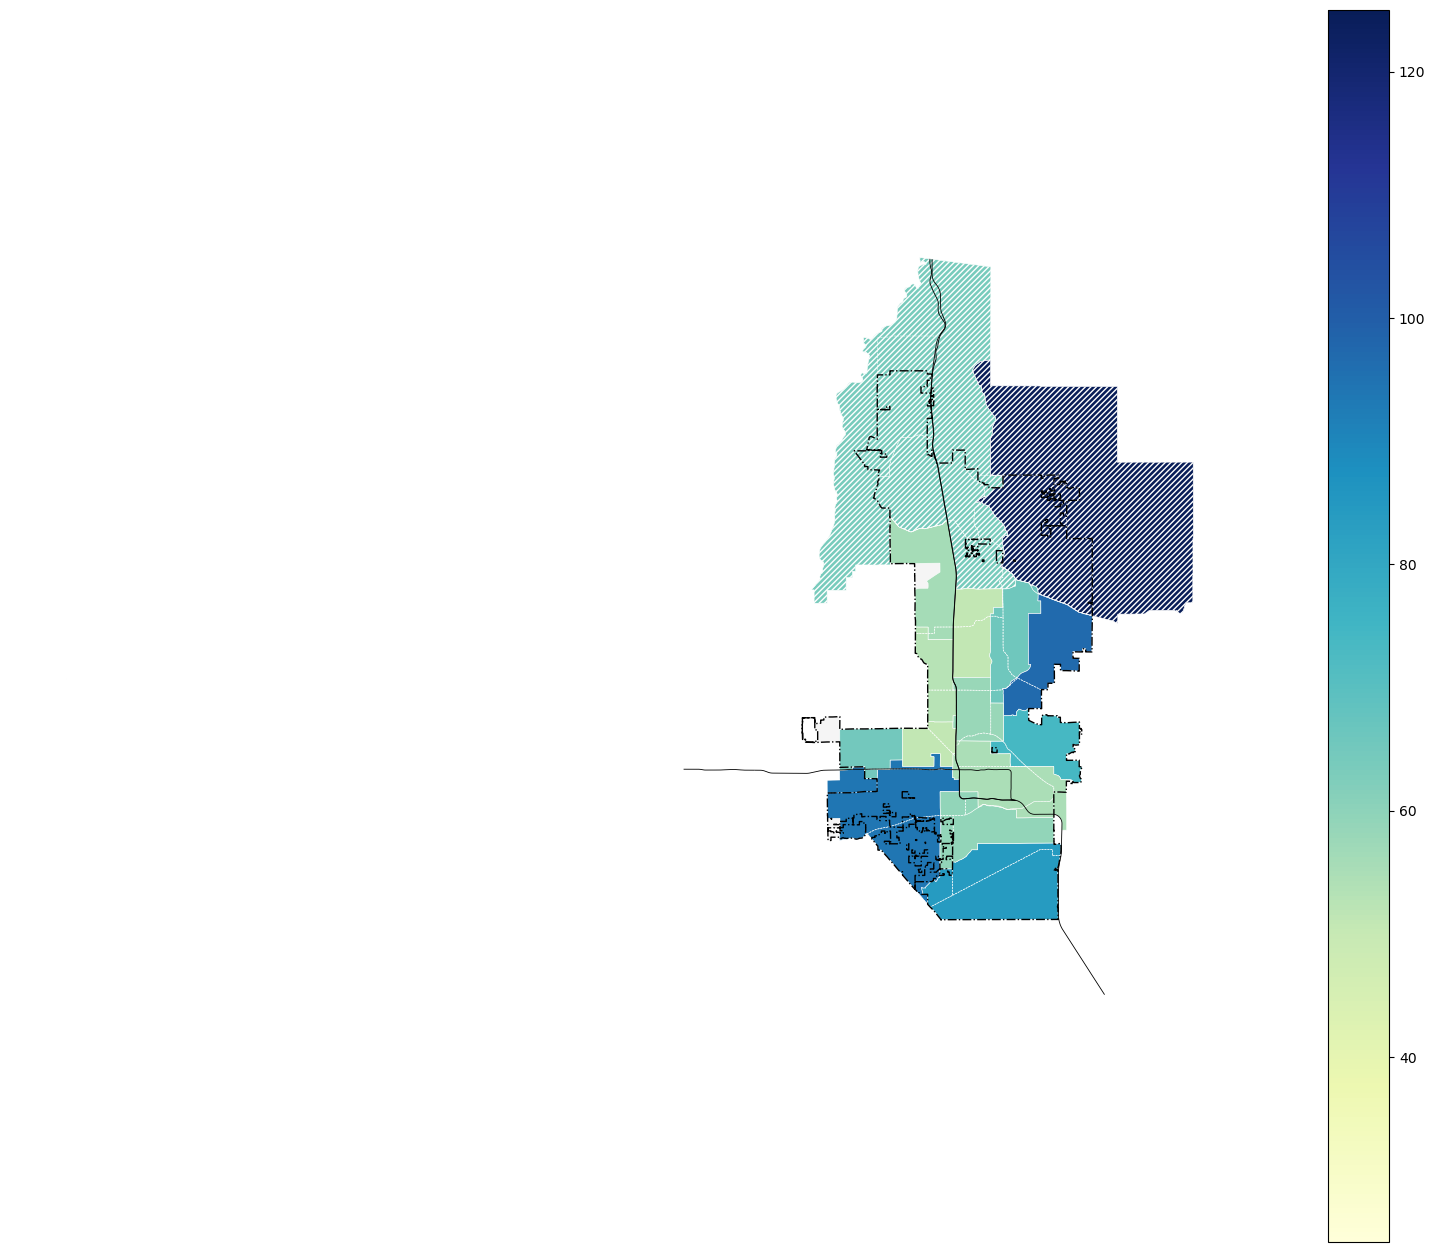

In [21]:
# nonAZ own per cap total
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=25,vmax=125)
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
df.plot(column = 'PerCap', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
plt.savefig(f'img/nonAZ_percap_tot_0820.jpg', dpi = 300) # saving each plot